# **Project-Assignment-1 : Rice Classification**

## **Introduction**

Our study aims to explore fundamental machine learning concepts using the **scikit-learn** library, focusing on different classification methods and evaluation metrics. The primary objective is to classify rice samples based on their textual features of rice imagegs and rice images own using **K-Nearest Neighbors (KNN), Weighted KNN, Naive Bayes, Random Forest, and Support Vector Machine (SVM)** classifiers.  

The dataset consists of **75,000 samples**, which are split into **80% training** and **20% testing** to ensure a fair model evaluation. Additionally, **K-Fold Cross Validation (K=3,5,7)** is applied to assess the robustness of each classifier and minimize potential bias in model performance.  

Throughout the project, we implemented various preprocessing steps to enhance classification accuracy. Since some algorithms, such as **Multinomial Naive Bayes**, cannot handle negative values, **MinMaxScaler** was used to scale feature values appropriately. Furthermore, **Weighted KNN** was tested alongside standard KNN to analyze the impact of different distance-weighting techniques.

Each classifier’s performance was evaluated using key metrics, including **accuracy, precision, recall, and F1-score**. Confusion matrices were also generated to visualize classification performance. The results of these evaluations provide insights into the effectiveness of each algorithm in handling high-dimensional features.

By the end of this project, we aim to gain a deeper understanding of how different classification methods perform on structured numerical datasets and the impact of **data preprocessing** and **validation techniques** on model performance.


### **Classification Methods**

##### **KNN**

- **Concept**: KNN works by finding the 'k' closest data points (neighbors) to a new data point and making predictions based on the majority class (for classification) or the average value (for regression) of these neighbors.

- **How it works**:
    1. Choose the number of neighbors 'k'.
    2. Calculate the distance between the new data point and all other data points in the dataset.
    3. Identify the 'k' closest neighbors.
    4. For classification, assign the most common class among the neighbors to the new data point. For regression, assign the average value of the neighbors to the new data point.

- **Advantages**: 
    - Simple to understand and implement.
    - No training phase required.
- **Disadvantages**: 
    - Can be computationally expensive for large datasets, sensitive to the choice of 'k' and the distance metric, and can be affected by irrelevant features.

KNN is often used as a baseline model due to its simplicity and effectiveness for certain types of problems.

##### **Weighted KNN**

- **Concept**   
    Weighted K-Nearest Neighbors (KNN) is a variation of the *KNN algorithm* where *each neighbor’s contribution to the prediction is weighted based on its distance* to the query point. Closer neighbors have *higher influence* than farther ones.

- **How it works**   
    1. Choose the number of neighbors, *k*.
    2. Calculate the *distance* between the new data point and all other data points in the dataset.
    3. Identify the *k closest neighbors*.
    4. Assign *weights* to the neighbors — typically, the weight is *inversely proportional to the distance* (e.g., weight = 1/distance). This way, closer points contribute more.
    5. For *classification, the predicted class is determined using a **weighted vote* (closer neighbors count more than farther ones).
    6. For *regression, the predicted value is the **weighted average* of the k neighbors' values.

- **Advantages**    
    - More *flexible and accurate* than standard KNN, especially when neighbors are not uniformly distributed.
    - Helps to reduce the impact of *distant outliers* compared to unweighted KNN.
    - Simple to understand and implement.

- **Disadvantages** 
    - Still *computationally expensive* for large datasets.
    - Requires tuning of *k* and choosing an appropriate *distance metric*.
    - Sensitive to irrelevant or redundant features.


##### **Random Forest**

- **Concept**  
    Random Forest is an **ensemble learning algorithm** that combines multiple decision trees to improve prediction accuracy and reduce overfitting. Each tree is trained on a random subset of the data (both rows and columns), and the final prediction is made by averaging (for regression) or majority voting (for classification) across all trees.

- **How it works**  
    1. **Bootstrap sampling**: Randomly select subsets of the training data (with replacement) to train each tree.
    2. **Feature selection**: For each split in a tree, only a random subset of features is considered (this adds diversity).
    3. **Tree construction**: Each decision tree is grown independently, often to full depth.
    4. **Prediction**: For classification, each tree "votes" for a class, and the majority vote is the final prediction. For regression, predictions from all trees are averaged.

- **Advantages**  
    - Handles both classification and regression tasks.
    - **Reduces overfitting** by averaging multiple trees.
    - Handles missing data and categorical variables well.
    - Works well with large datasets and high-dimensional spaces.
    - Provides feature importance scores.

- **Disadvantages**  
    - Can be slower to train and predict compared to simpler models.
    - Large forests can require significant memory.
    - Predictions are less interpretable than a single decision tree.

##### **Naive Bayes**

- **Concept**  
    Naive Bayes is a probabilistic algorithm based on **Bayes' Theorem**, which calculates the probability of a class given some features. It assumes that all features are **independent** (the "naive" assumption), which simplifies the calculation.

- **How it works**  
    1. **Calculate prior probabilities**: The overall probability of each class in the training data.
    2. **Calculate likelihoods**: For each feature, calculate the probability of that feature value occurring within each class.
    3. **Apply Bayes' Theorem**: Combine the prior probabilities and likelihoods to calculate the **posterior probability** for each class.
    4. **Classify**: Assign the data point to the class with the highest posterior probability.

- **Advantages**  
    - Fast to train and predict.
    - Works well with high-dimensional data.
    - Simple to implement.
    - Performs surprisingly well even with the unrealistic independence assumption.

- **Disadvantages**  
    - Relies heavily on the independence assumption, which is rarely true in real-world data.
    - Struggles with datasets where features have strong correlations.



##### **SVM**

- **Concept**  
    Support Vector Machine (SVM) is a **supervised learning algorithm** used for both **classification** and **regression** tasks, although it is more commonly used for classification. SVM works by finding the **optimal hyperplane** that best separates data points of different classes in a high-dimensional space.

- **How it works**  
    1. SVM identifies the hyperplane that maximizes the **margin** (distance) between data points of different classes.
    2. Only the **support vectors** — the data points closest to the hyperplane — are used to define the position and orientation of the hyperplane.
    3. For **linearly separable data**, a straight line (in 2D) or flat hyperplane (in higher dimensions) separates the classes.
    4. For **non-linearly separable data**, SVM uses the **kernel trick** to map data into a higher-dimensional space where a linear separation is possible.

- **Advantages**  
    - Effective for **high-dimensional data** (many features).
    - Works well when there is a **clear margin of separation** between classes.
    - **Robust to overfitting** if the number of features is greater than the number of samples.
    - Can handle both **linear and non-linear classification** using different **kernels** (linear, polynomial, RBF, etc.).

- **Disadvantages**  
    - **Memory-intensive** and slow for large datasets.
    - Performance depends heavily on the **choice of kernel** and **hyperparameters** (C and gamma).
    - Less interpretable than simpler models like decision trees.

### **Implementing Libraries and Defining Useful Functions**

##### Import libraries

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

##### Define a function for calculation metrices

In [4]:
def get_metric_values(test, pred):
    accuracy = accuracy_score(test, pred, normalize=True)
    precision = precision_score(test, pred, average='macro', zero_division=0)
    recall = recall_score(test, pred, average='macro', zero_division=0)
    f1_score_value = f1_score(test, pred, average='macro', zero_division=0)
    return accuracy, precision, recall, f1_score_value

##### Define a function for showing metrices in a table

In [5]:

metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)']

def show_table(table_cells, row_labels, title):
    # set figure
    plt.figure(figsize=(8, 2))
    plt.title(title)
    plt.box(on=None)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # set colors
    rcolors = plt.cm.BuPu(np.full(len(row_labels), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(metrics), 0.1))

    # create table
    the_table = plt.table(
        cellText=table_cells,
        rowLabels=row_labels,
        rowColours=rcolors,
        colLabels=metrics,
        colColours=ccolors,
        loc='center',
        cellLoc='center',
        cellColours=None,
        rowLoc='center',
        colLoc='center',
        edges='closed'
    )

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(1, 1.5)

    plt.show()

## **PART I: Textual Data Analysis**

In Part I, we focused on applying multiple classification algorithms to a structured dataset of rice samples, each described by 106 numerical features. The primary goal was to identify the most accurate and robust classifier for distinguishing different rice varieties. Below is an expanded overview of the steps we took and the rationale behind them.

**<ins>1. Data Overview and Preprocessing</ins>**
- Dataset Size: We began with a large dataset containing 106 features per sample, totaling 75,000 entries.
- Splitting: To ensure a fair evaluation, we split the data into 80% for training and 20% for testing.
- Potential Issues: We inspected the dataset for missing values, outliers, and any anomalies that might affect classification.
- Scaling: For some algorithms (especially Multinomial Naïve Bayes), features cannot be negative, so we applied a MinMaxScaler to normalize values into a consistent range. This scaling also helped distance-based methods like KNN handle features on a comparable scale.

**<ins>2. K-Fold Cross Validation</ins>**
- We applied K-Fold Cross Validation (with K = 3, 5, 7) to assess how consistently each model performs across different splits.
- This approach helps to minimize the bias from any single train-test split and pushes the models toward robust generalization.

**<ins>3. Model Evaluation</ins>**
- Metrics: We used accuracy, precision, recall, and F1-score to capture various dimensions of performance.
- Confusion Matrix: We generated confusion matrices to visualize misclassifications and to diagnose where certain classes might be confused by the model.
- Comparison: By comparing these metrics across classifiers, we identified which algorithms handle the data distribution and feature space most effectively.

Get data and split it for train and test.

In [6]:
# Load data from CSV file
df = pd.read_csv('part_i.csv')

# Assuming the last column is the target variable and the rest are features
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Handling NaN values
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Define a function for classifiers

In [7]:
def classifier(model, model_str, title, kfold_value=0, pipeline_params=[]):
    pipeline = Pipeline([
        *pipeline_params,
        (model_str, model),
    ])

    if kfold_value: 
        # Define K-Fold cross-validator
        kf = KFold(n_splits=kfold_value, shuffle=True, random_state=42)
        # Perform cross-validation predictions
        y_pred = cross_val_predict(pipeline, X_train, y_train, cv=kf)
    else:
        # Train the classifier
        try:
            pipeline.fit(X_train, y_train)
        except ValueError as e:
            print(f"Error: {e}", model)
            return None
        # Make predictions
        y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1_score_value = get_metric_values(y_train if kfold_value else y_test, y_pred)
    
    # Confusion matrix
    matrix = confusion_matrix(y_train if kfold_value else y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(title)
    # Show it
    plt.show()

    # Create a table with metrics
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    return values

##### **k-Nearest Neighbor(kNN)**

In [8]:
def knn_classifier(k, kfold_value=0, pipeline_params=[]):
    return classifier(KNeighborsClassifier(n_neighbors=k), 'knn', f'Confusion Matrix for k={k}', kfold_value=kfold_value, pipeline_params=pipeline_params)

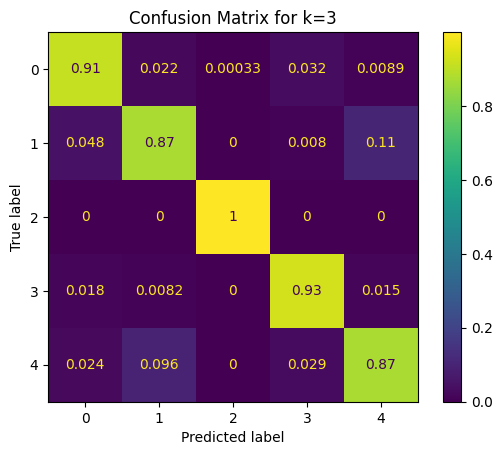

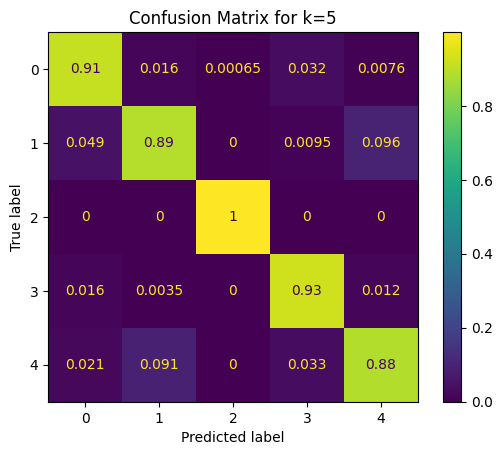

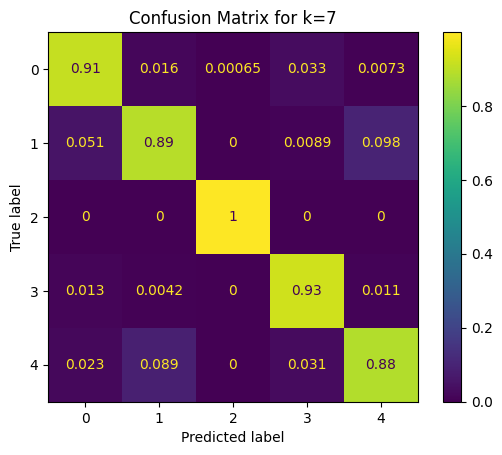

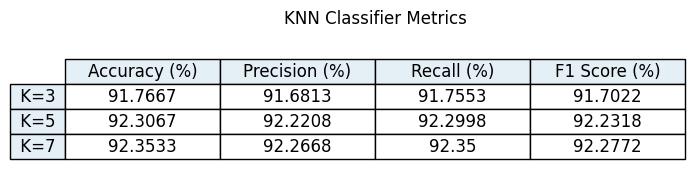

In [9]:
k_values = [3, 5, 7]
knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = knn_classifier(k)
    knn_values.append(values)

show_table(knn_values, [f" K={k} " for k in k_values], "KNN Classifier Metrics")

**K = 7 has the best F1 score, so we can use K-fold validation on that value to see if we can get a higher result.**

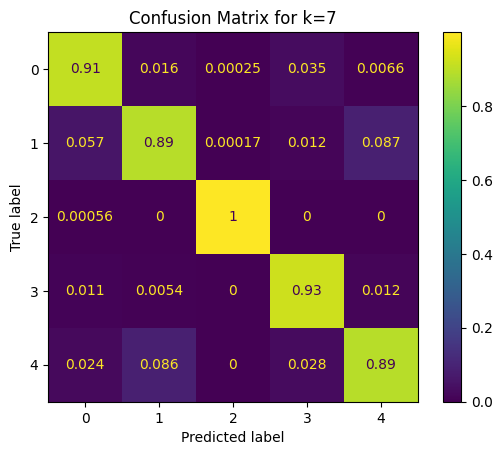

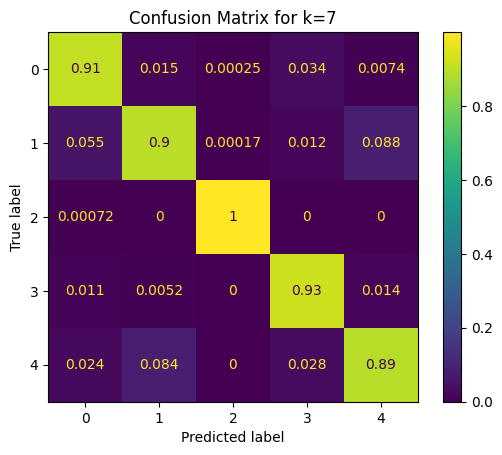

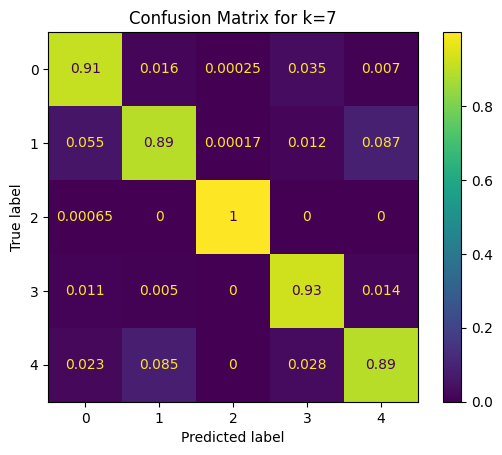

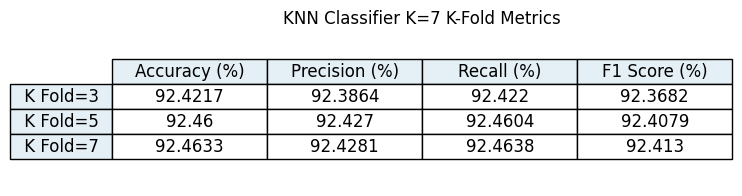

In [10]:
kfold_values = [3, 5, 7]
knn_kfold_values = []
# run with k=3, k=5, k=7
for kfold in kfold_values:
    values = knn_classifier(k=7, kfold_value=kfold)
    knn_kfold_values.append(values)

show_table(knn_kfold_values, [f" K Fold={k} " for k in kfold_values], "KNN Classifier K=7 K-Fold Metrics")

We got better results overall with the K-fold validation but the best result is right now is 7 for K and 7 for K-fold.

##### **Weighted k-Nearest Neighbor**

In [11]:
def weighted_knn_classifier(k, kfold_value=0, pipeline_params=[]):
    return classifier(KNeighborsClassifier(n_neighbors=k, weights='distance'), 'wknn', f'Confusion Matrix for k={k}',pipeline_params=pipeline_params, kfold_value=kfold_value)

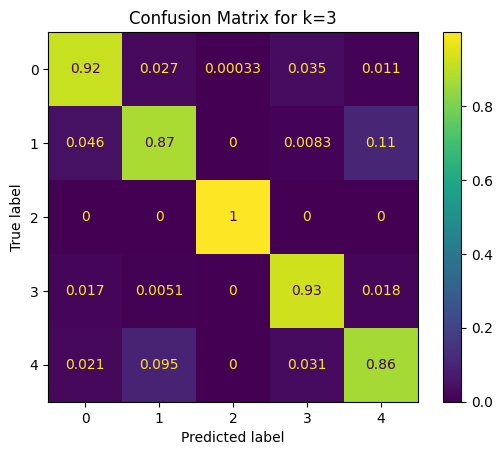

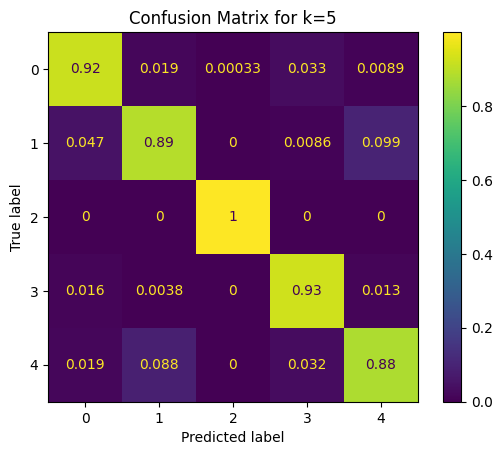

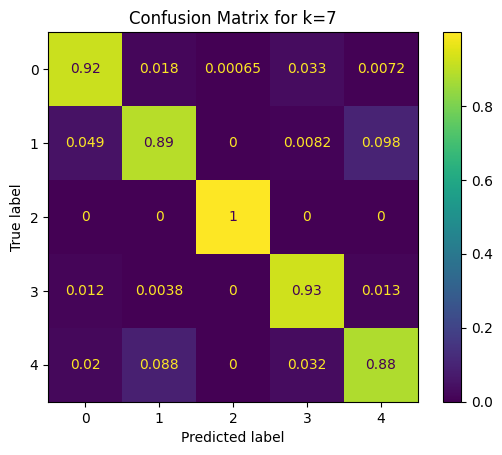

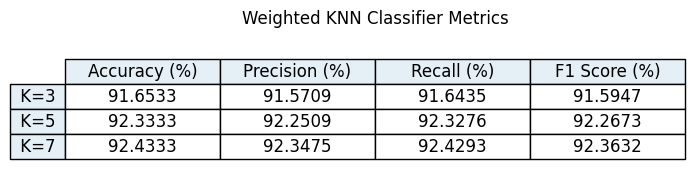

In [12]:
k_values = [3, 5, 7]
weighted_knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = weighted_knn_classifier(k)
    weighted_knn_values.append(values)

show_table(weighted_knn_values, [f" K={k} " for k in k_values], "Weighted KNN Classifier Metrics")

**K = 7 has the best F1 score, so we can use K-fold validation on that value to see if we can get a higher result.**

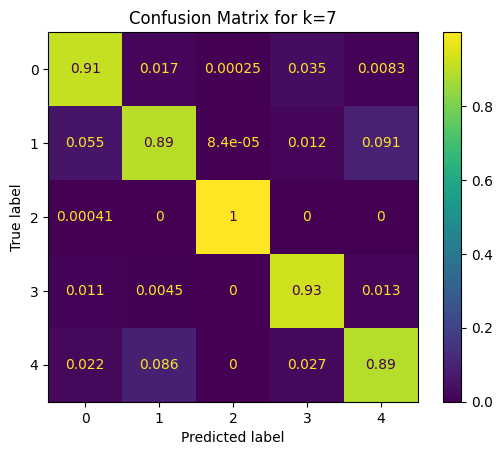

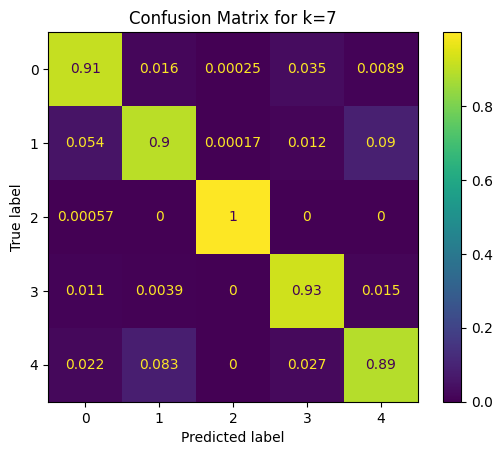

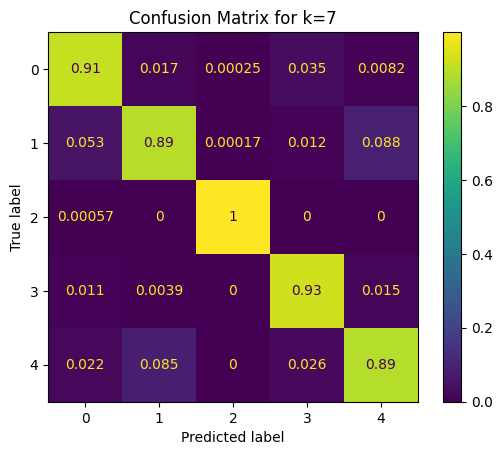

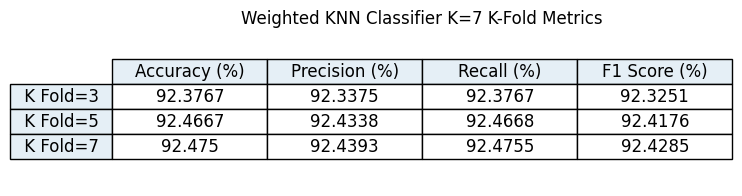

In [13]:
kfold_values = [3, 5, 7]
knn_kfold_values = []
# run with k=3, k=5, k=7
for kfold in kfold_values:
    values = weighted_knn_classifier(k=7, kfold_value=kfold)
    knn_kfold_values.append(values)

show_table(knn_kfold_values, [f" K Fold={k} " for k in kfold_values], "Weighted KNN Classifier K=7 K-Fold Metrics")

Like normal KNN, Weighted KNN also gave overall better results with K-fold validation and we got the best results with K = 7 and K-Fold = 7 values.

##### **Naive Bayes**

In [14]:
nb_values = [GaussianNB(), MultinomialNB(), BernoulliNB()]
nb_names = ["Gaussian", "Multinomial", "Bernoulli"]

def naive_bayes_classifier(nb_type, kfold_value=0):
    return classifier(nb_type, 'nb', f'Confusion Matrix for {nb_names[nb_values.index(nb_type)]} Naive Bayes', pipeline_params=[('scaler', MinMaxScaler())], kfold_value=kfold_value)

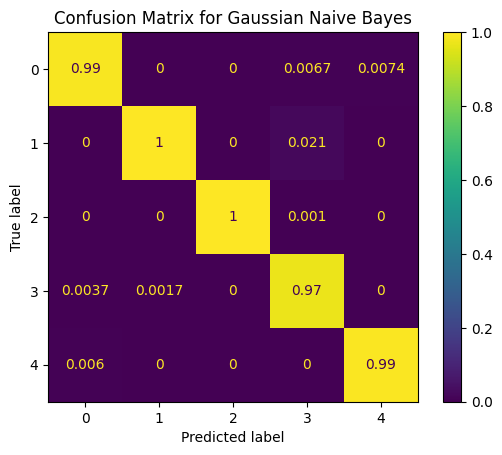

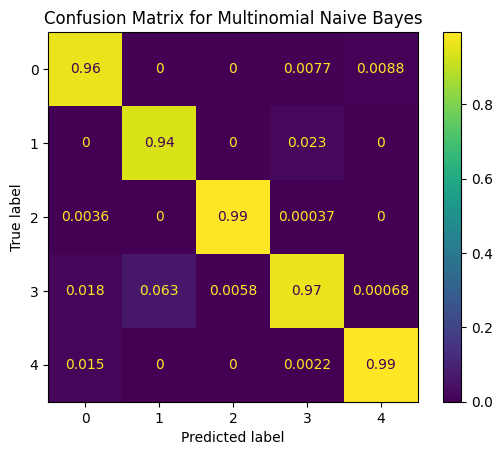

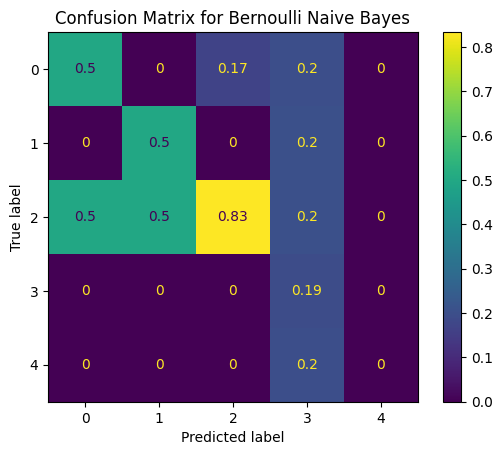

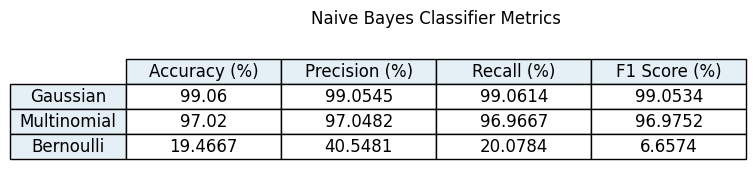

In [15]:
nb_values_values = []
# run with Gaussian, Multinomial, Bernoulli
for nb, name in zip(nb_values, nb_names):
    values = naive_bayes_classifier(nb)
    if values:
        nb_values_values.append(values)
    else:
        print(f"Skipping {name} due to error.")

show_table(nb_values_values, nb_names, "Naive Bayes Classifier Metrics")


Gaussian Naive Bayes has the best F1 score here, because Bernoulli works with bitwise data and our rice data has 5 classes it doesn't give good results with this data.

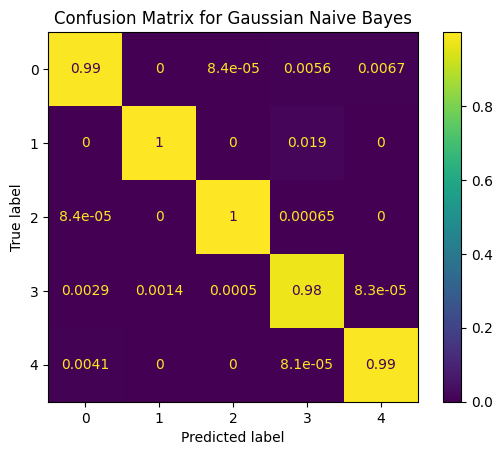

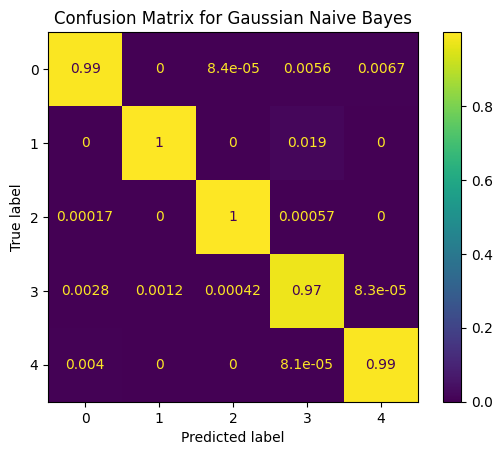

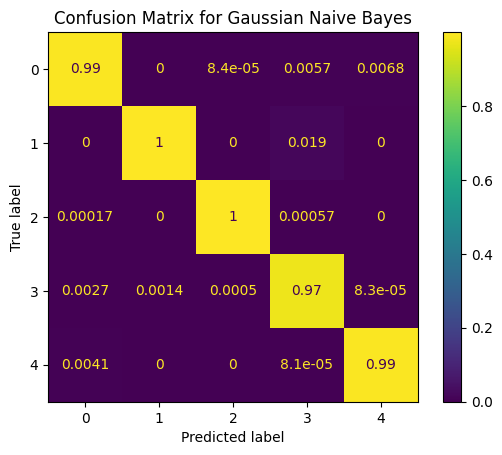

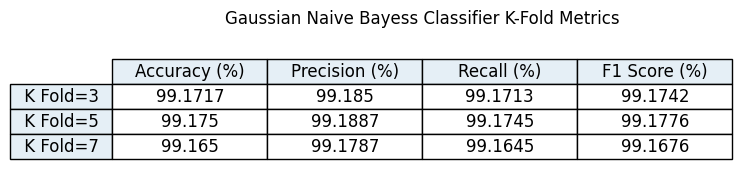

In [16]:
kfold_values = [3, 5, 7]
nb_kfold_values = []

# run with k=3, k=5, k=7
for kfold in kfold_values:
    values = naive_bayes_classifier(nb_values[0], kfold_value=kfold)
    nb_kfold_values.append(values)

show_table(nb_kfold_values, [f" K Fold={k} " for k in kfold_values], "Gaussian Naive Bayess Classifier K-Fold Metrics")

Again with K-fold validation we got higher results. But because Gaussian NB already gave us a score higher than 99% the increase in the K-Fold metrics not that important.

##### **Random Forest**

In [17]:
def random_forest_classifier(n, kfold_value=0):
    return classifier(RandomForestClassifier(n_estimators = n), 'rfc', f'Confusion Matrix for Tree Count={n}', kfold_value=kfold_value)

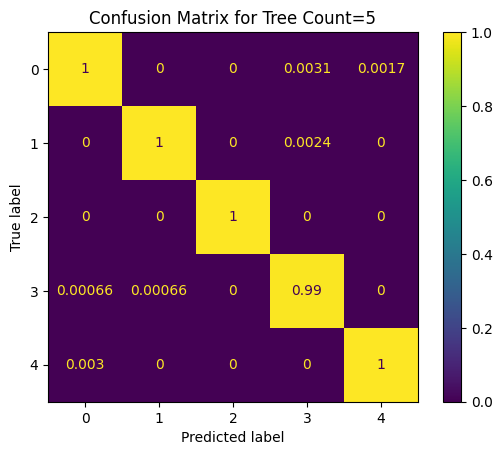

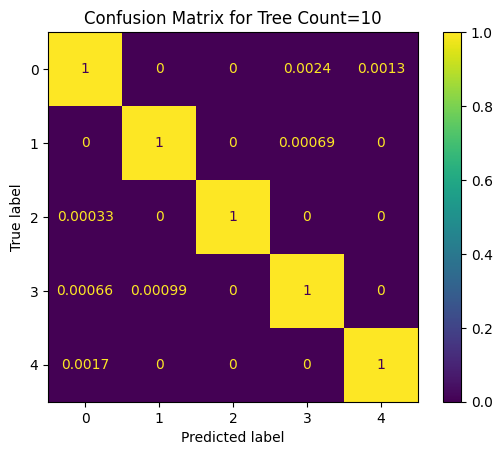

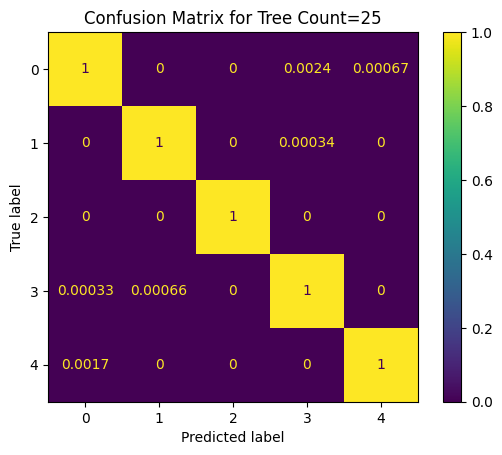

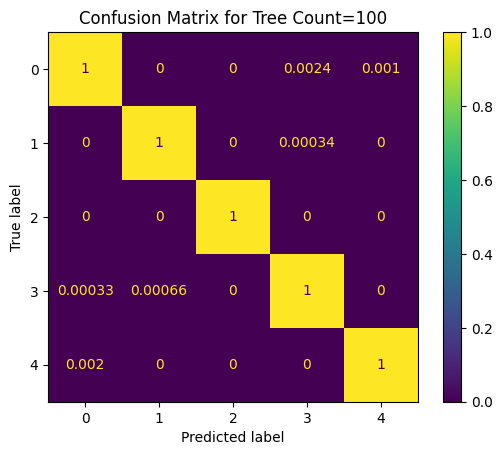

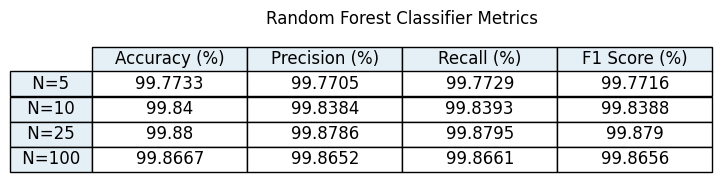

In [18]:
n_values = [5, 10, 25, 100]
random_forest_values = []
# run with k=3, k=5, k=7
for n in n_values:
    values = random_forest_classifier(n)
    random_forest_values.append(values)

show_table(random_forest_values, [f" N={n} " for n in n_values], "Random Forest Classifier Metrics")

Random forest gave so good results event without K-fold validation, with K-fold can it get better we can try.

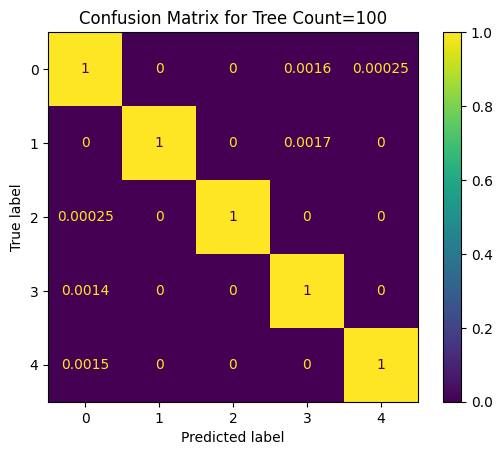

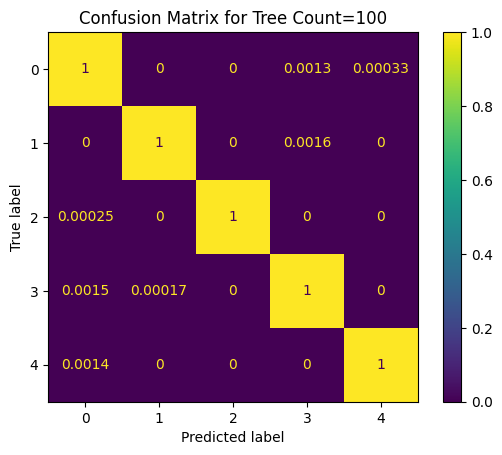

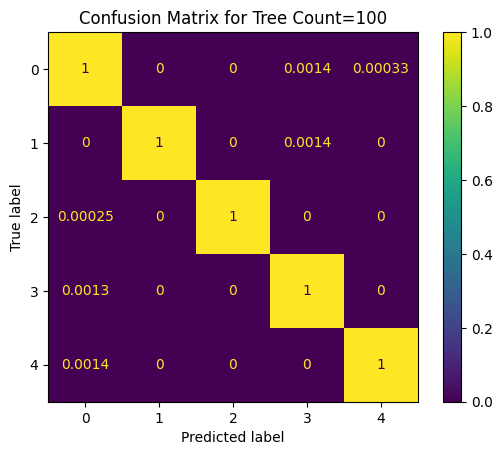

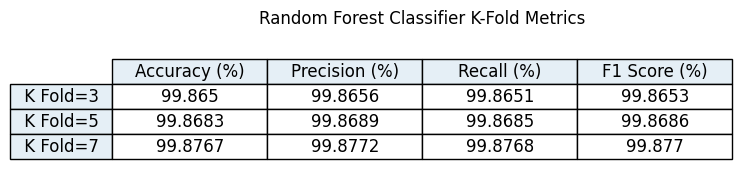

In [19]:
kfold_values = [3, 5, 7]
rfc_kfold_values = []

# run with k=3, k=5, k=7
for kfold in kfold_values:
    values = random_forest_classifier(n=100, kfold_value=kfold)
    rfc_kfold_values.append(values)

show_table(rfc_kfold_values, [f" K Fold={k} " for k in kfold_values], "Random Forest Classifier K-Fold Metrics")

With K-fold values we got worse results. So we can say randomforest, unlike others, works better without K-fold validation.

##### **Support Vector Machines(SVM)**

Define classifier function

In [20]:
def svm_classifier(kernel, kfold_value=0):
    return classifier(SVC(kernel=kernel), 'svc', f'Confusion Matrix for {kernel} SVM', pipeline_params=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=10))], kfold_value=kfold_value)

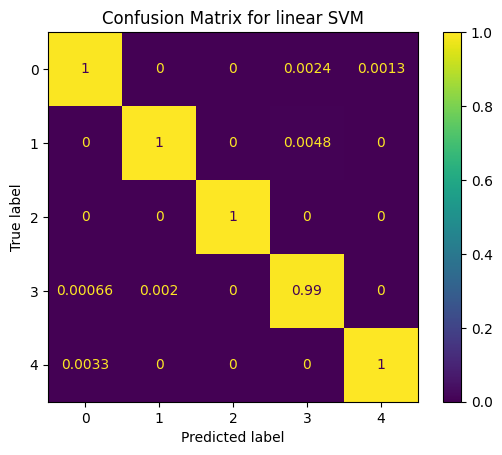

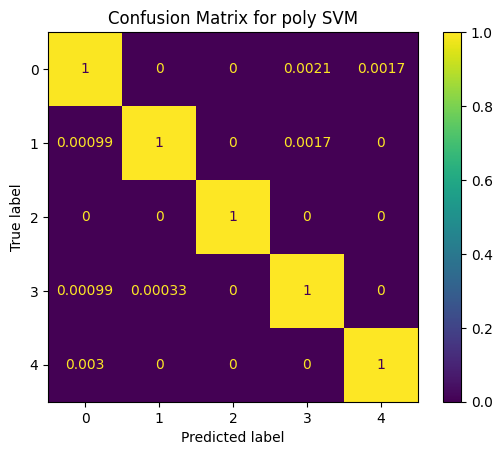

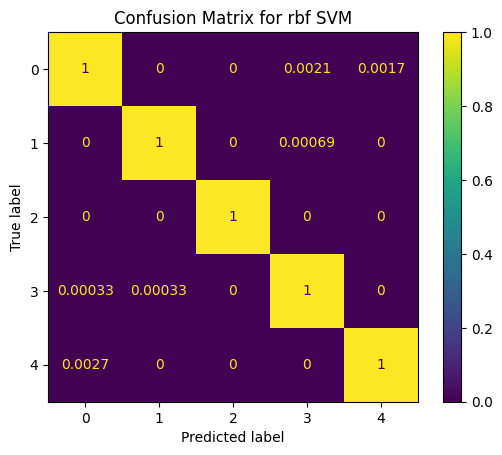

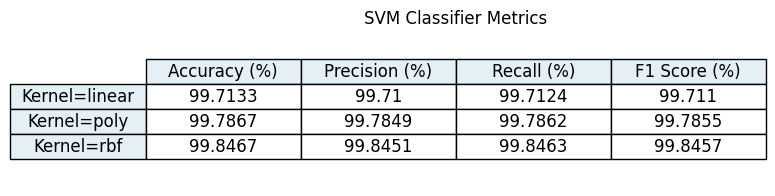

In [21]:
# Parameter values for SVM
kernel_values = ['linear', 'poly', 'rbf']

svm_values = []
for kernel in kernel_values:
    values = svm_classifier(kernel)
    svm_values.append(values)

show_table(svm_values, [f"Kernel={k}" for k in kernel_values], "SVM Classifier Metrics")


SVM gave best results in all used models without K-fold validation. Best kernel is poly according to results, we can try with K-fold can it get better?

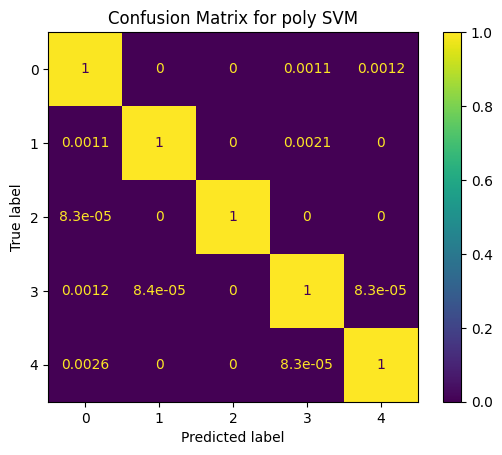

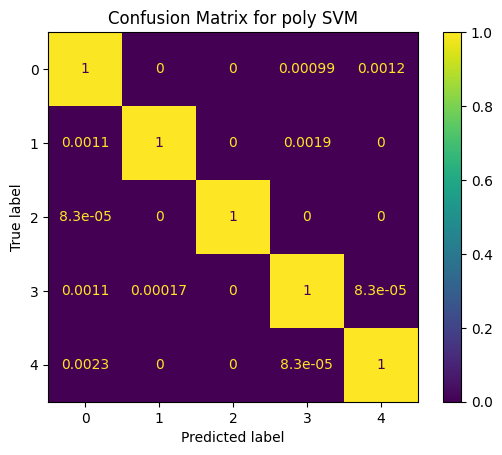

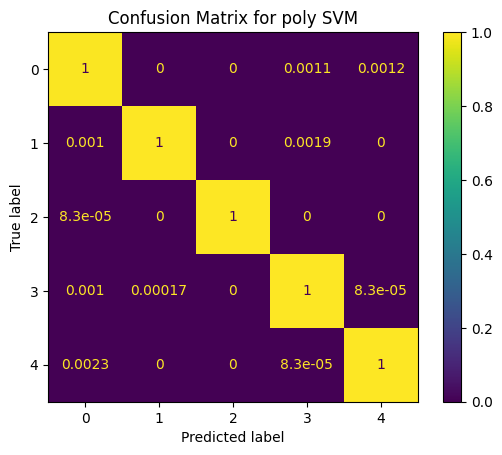

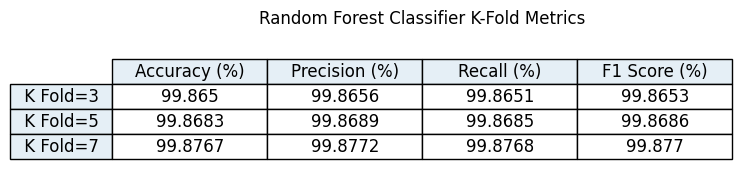

In [22]:
kfold_values = [3, 5, 7]
svm_kfold_values = []

# run with k=3, k=5, k=7
for kfold in kfold_values:
    values = svm_classifier(kernel='poly', kfold_value=kfold)
    svm_kfold_values.append(values)

show_table(rfc_kfold_values, [f" K Fold={k} " for k in kfold_values], "Random Forest Classifier K-Fold Metrics")

### **PART I Conclusion**

Show all values from the different classification methods with different settings (parameters).

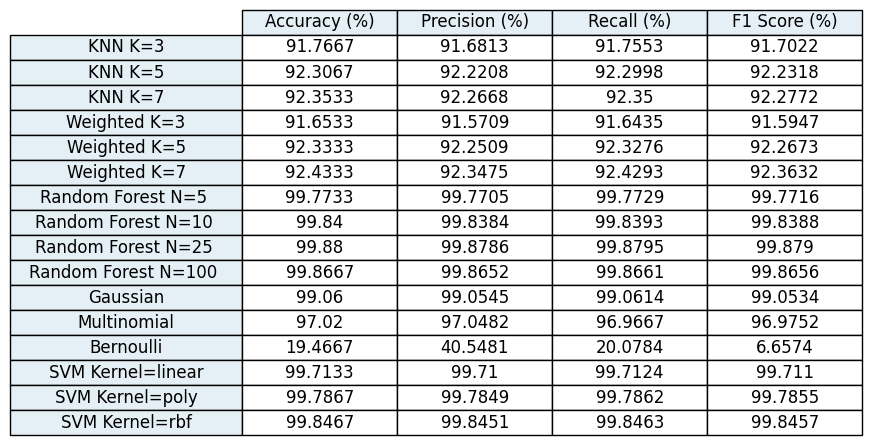

In [23]:
all_values = [*knn_values, *weighted_knn_values, *random_forest_values, *nb_values_values, *svm_values]
all_row_labels = [ *[f"KNN K={k}" for k in k_values],   *[f"Weighted K={k}" for k in k_values], *[f"Random Forest N={n} " for n in n_values], *nb_names, *[f"SVM Kernel={k}" for k in kernel_values] ]
show_table(all_values, all_row_labels, "")

#### **Conclusion**  

In this study, we tested multiple classification algorithms, including **K-Nearest Neighbors (KNN), Weighted KNN, Random Forest, Naïve Bayes, and Support Vector Machine (SVM)**, to classify rice samples based on textual features. The dataset contained **75,000 samples**, split into **80% training and 20% testing**. To make sure our results were reliable, we used **K-Fold Cross-Validation (K=3,5,7)**, which helps reduce overfitting and provides a better evaluation of each model. The models were compared using **accuracy, precision, recall, and F1-score**, along with a confusion matrix to check errors.  

##### <ins>**Performance Results**</ins> 

- **SVM models** performed **exceptionally well**, with accuracy **over 99.85%** in all cases. Among different kernels, the **polynomial kernel** gave the **best F1-score (99.91%)**, showing that it handled the data very effectively and made reliable predictions.  

- **Random Forest** also gave **strong results**, with **F1-scores above 99.7%** across different numbers of trees. Using **10 or more trees** provided **stable and accurate** results, confirming that this method is great for handling large feature sets.  

- **KNN classifiers** performed **well but were not as strong** as Random Forest and SVM, with **F1-scores around 91-92%**. This suggests that KNN is **less effective for high-dimensional data**, as distance-based calculations can struggle when there are many features.  

- **Weighted KNN** slightly improved over standard KNN by giving more importance to closer neighbors, but it was still **not as effective** as ensemble methods or SVM.  

- **Naive Bayes** gave **mixed results** depending on the type used:
  - **Gaussian Naive Bayes** performed **well**, with **F1-scores above 99%**, respectively.  
  - **Multinomial Naive Bayes** performed **well**, with **F1-scores above 96%**, respectively. The Multinomial Naive Bayes model does not work properly, especially when the dataset contains negative values. Because it is designed for count-based or frequency-based data and cannot handle negative values, leading to incorrect probability estimations and inaccurate predictions. Becuase of this we aplied *MinMaxScaler* to our dataset when performing it.
  - **Bernoulli Naive Bayes**, however, performed **poorly** with an **F1-score of just 6.65%**, showing that it is **not suitable** for this dataset. This is likely because Bernoulli Naive Bayes works better with binary data (0-1), while our dataset contains continuous numerical features.  

##### <ins>**Impact of K-Fold Cross-Validation**</ins>  

To make sure our models were reliable, we applied **K-Fold Cross-Validation (K=3, 5, 7)** to best f1 score settings in each models/classifiers classification and noticed the following patterns:  

- **Random Forest and SVM had very consistent results** across different folds, meaning they **generalized well** and were **not affected much by changes in training data**.  
- **KNN had slightly more variation**, meaning its performance **depended more on the specific data split**.  
- **Naive Bayes gave steady results**, but small changes in precision and recall were observed as the fold size changed.  
- **Increasing K (from 3 to 7) made the results more stable**, since each model got a larger training set per fold, reducing the impact of unusual data points.  

##### <ins>**Final Thoughts**</ins>

Overall, **SVM and Random Forest** were the **best-performing models**, as they provided **both high accuracy and f1 scores with stable results** across different folds. **KNN was decent but not as strong**, while **Naive Bayes worked well depending on the variant**. **K-Fold Cross-Validation helped confirm that our results were reliable**, ensuring that the reported accuracy and F1-scores were not just from a lucky train-test split.  

## **PART II: Image Data Analysis**

In Part II, we focused on image-based rice samples corresponding to the same varieties studied in Part I. Our goal was to extract meaningful features from the images—such as RGB statistics and thresholded binary representations—to conduct a classification process similar to Part I. Below is an expanded overview of the steps we followed and the rationale behind them.

**<ins>1. Image Data and Preprocessing</ins>**
- RGB Extraction: Each sample image was processed to compute red, green, and blue channel values. We captured statistics (e.g., mean, variance) for each channel to characterize pixel intensity distributions.
- Thresholding: We applied a binary threshold to the images, categorizing each pixel as 0 or 1 based on intensity. This helped emphasize shape or edge details that might be lost in raw RGB space.
- Additional Features: We explored other basic transformations (e.g., grayscale conversion or histogram calculations) to capture different perspectives of the grain shape and texture.

**<ins>2. K-Fold Cross Validation</ins>**
- We used the same K-Fold Cross Validation approach to ensure robustness and time efficency.
- Models performance could vary more with image data, as pixel-based features can be sensitive to slight changes in train-test splits.

**<ins>3. Model Evaluation</ins>**
- Metrics: As before, accuracy, precision, recall, and F1-score were used.
- Visualization: Confusion matrices revealed where classes might be visually similar (e.g., two rice varieties with similar texture or color).
- Comparison: We paid special attention to the impact of feature extraction techniques (RGB stats, thresholding, histograms) on each classifier’s performance.

In [24]:
# Feature extraction function
def extract_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))  # Resize

    # RGB Features
    r_mean, g_mean, b_mean = np.mean(image, axis=(0, 1))
    r_var, g_var, b_var = np.var(image, axis=(0, 1))

    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256]).flatten()

    # Combine all features
    features = [r_mean, g_mean, b_mean, r_var, g_var, b_var] + list(hist)
    return features

In [25]:
# Prepare dataset
data = []
labels = []

root_dir = "../data/part_ii"
categories = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

for label, category in enumerate(categories):
    category_path = f"{root_dir}/{category}"
    for image_name in os.listdir(category_path)[:]:
        image_path = os.path.join(category_path, image_name)
        features = extract_features(image_path)
        data.append(features)
        labels.append(label)

# Convert to DataFrame
df = pd.DataFrame(data)
df["label"] = labels

# Split dataset
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Data", X_train)

Train Data              0          1          2             3             4    \
1200   24.410156  24.161865  24.307617   4658.899155   4586.014571   
64130  24.674805  22.316406  22.184082   5084.489463   4171.049301   
11518  23.594238  23.631348  23.771973   4725.957916   4756.291342   
70523  23.507324  21.257324  21.408203   4596.985298   3767.151558   
34803  60.146484  61.927734  61.438965  10232.776882  10846.702297   
...          ...        ...        ...           ...           ...   
37194  57.437012  58.919189  58.389160   9774.277771  10297.430237   
6265   22.482178  21.930908  22.011719   4196.601245   4013.714709   
54886  18.572021  17.440674  17.166260   3431.572450   3033.882711   
860    26.112549  25.279297  25.291504   4597.511014   4337.408810   
15795  29.483154  27.583252  27.358398   5918.267783   5225.531155   

                5       6      7      8     9    ...   252   253   254   255  \
1200    4639.910743  2664.0   92.0  805.0  30.0  ...   1.0   0.0   0

#### KNN

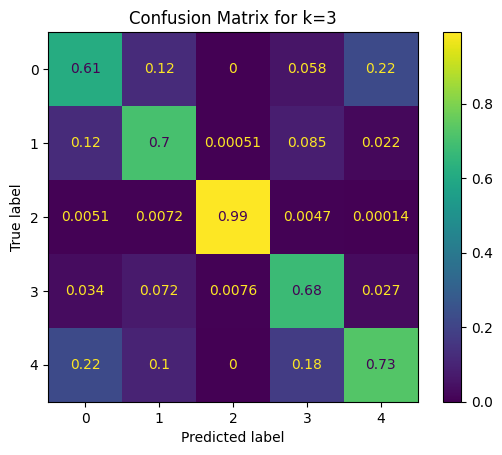

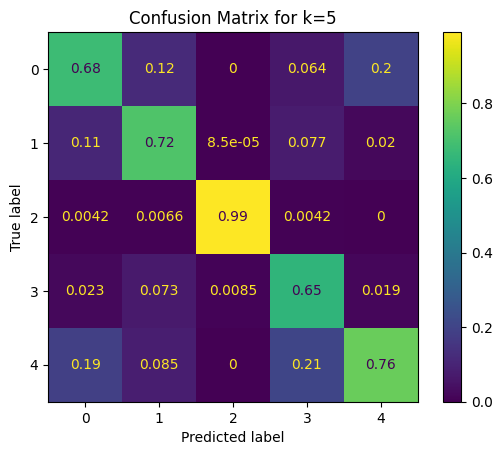

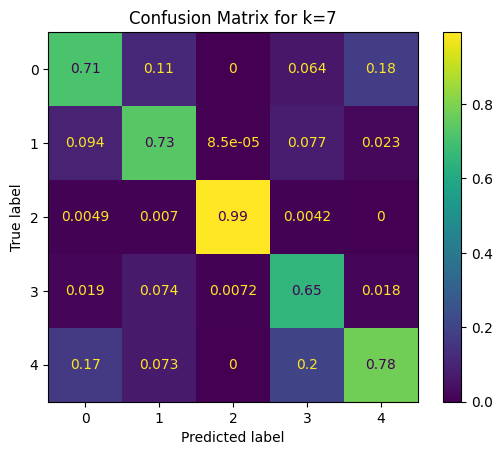

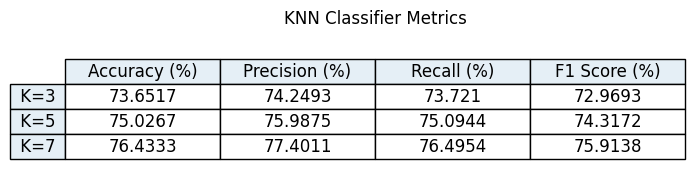

In [26]:
k_values = [3, 5, 7]
knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = knn_classifier(k, kfold_value=10, pipeline_params=[('scaler', MinMaxScaler())])
    knn_values.append(values)

show_table(knn_values, [f" K={k} " for k in k_values], "KNN Classifier Metrics")

#### Weighted KNN

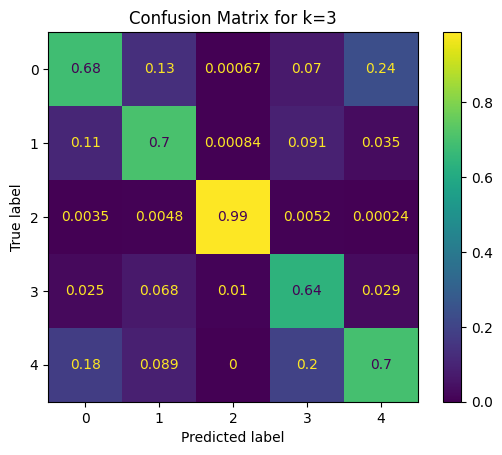

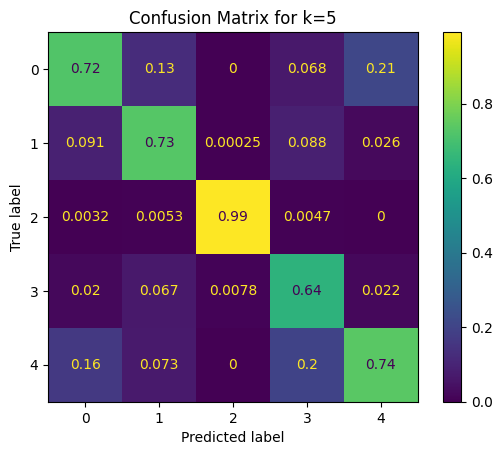

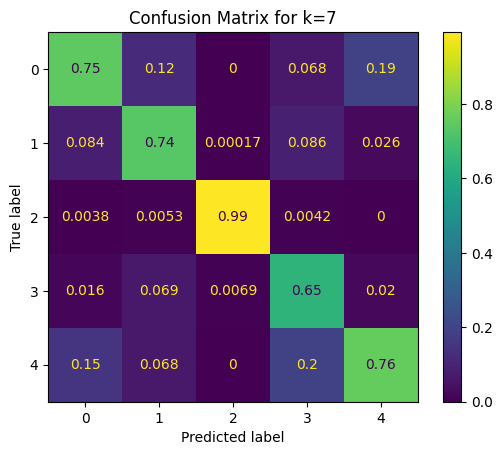

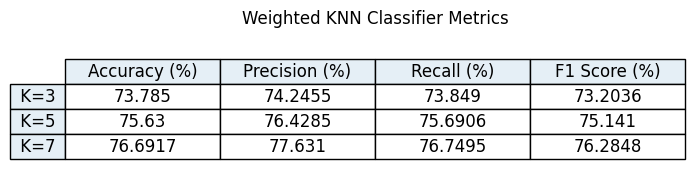

In [27]:
k_values = [3, 5, 7]
weighted_knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = weighted_knn_classifier(k, kfold_value=10, pipeline_params=[('scaler', MinMaxScaler())])
    weighted_knn_values.append(values)

show_table(weighted_knn_values, [f" K={k} " for k in k_values], "Weighted KNN Classifier Metrics")

#### Naive Bayes

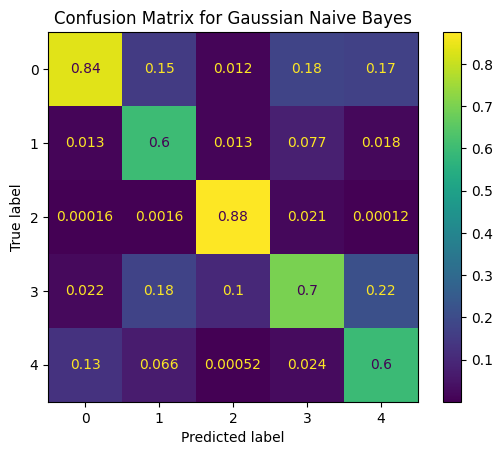

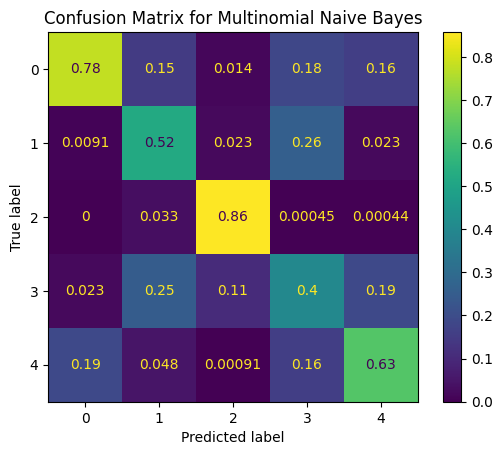

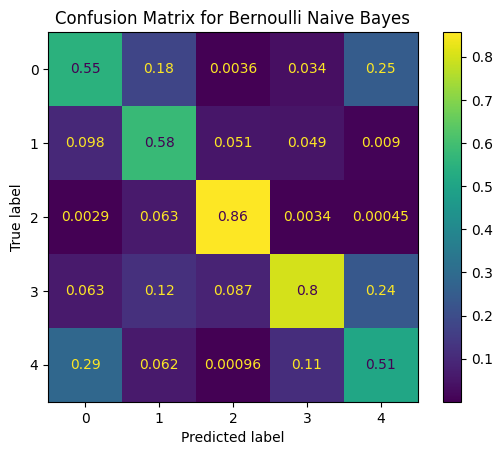

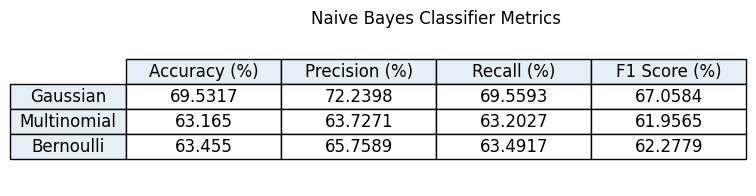

In [28]:
nb_values_values = []
# run with Gaussian, Multinomial, Bernoulli
for nb, name in zip(nb_values, nb_names):
    values = naive_bayes_classifier(nb, kfold_value=10)
    if values:
        nb_values_values.append(values)
    else:
        print(f"Skipping {name} due to error.")

show_table(nb_values_values, nb_names, "Naive Bayes Classifier Metrics")


#### Random Forest

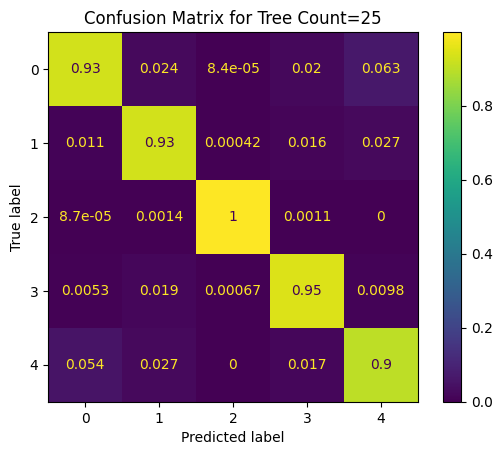

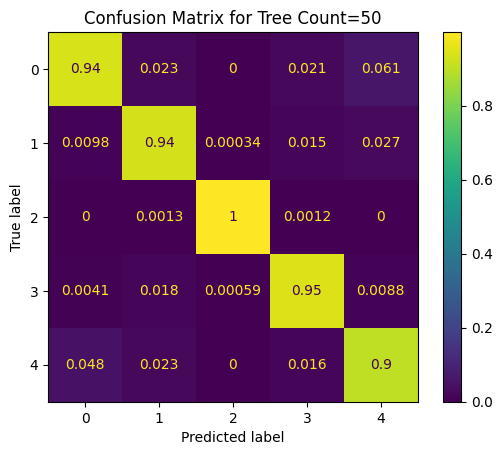

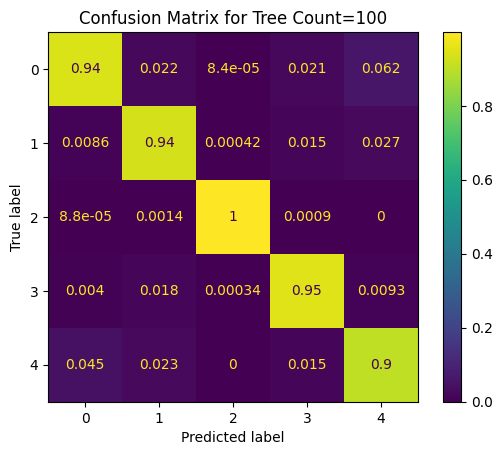

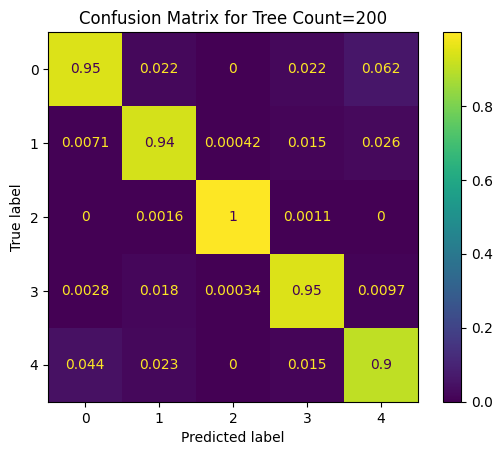

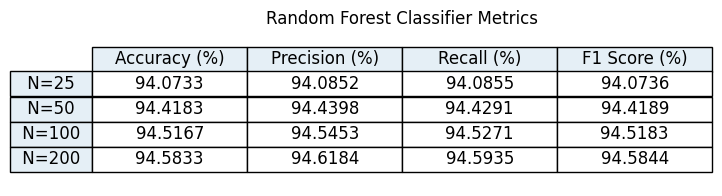

In [29]:
n_values = [25, 50, 100, 200]
random_forest_values = []
# run with k=3, k=5, k=7
for n in n_values:
    values = random_forest_classifier(n, kfold_value=10)
    random_forest_values.append(values)

show_table(random_forest_values, [f" N={n} " for n in n_values], "Random Forest Classifier Metrics")

##### **Support Vector Machines(SVM)**

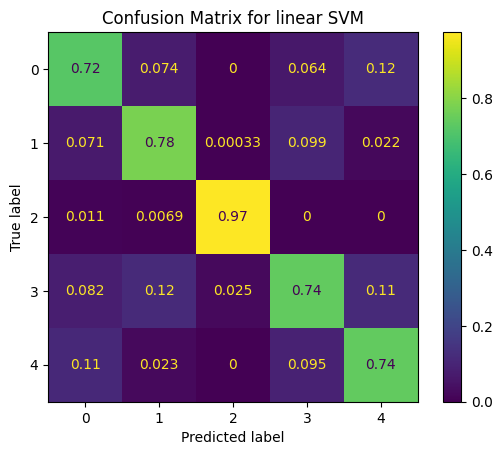

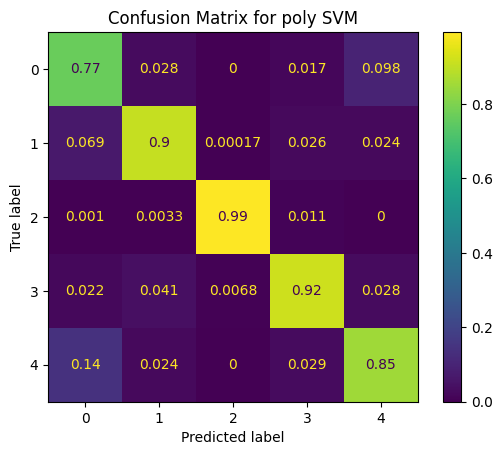

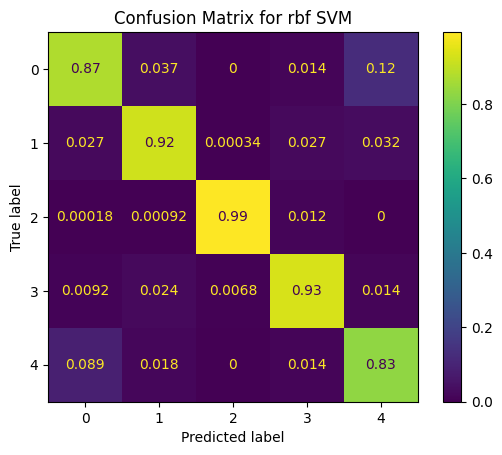

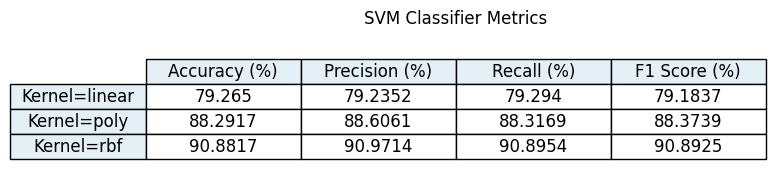

In [30]:
kernel_values = ['linear', 'poly', 'rbf']
svm_values = []

for kernel in kernel_values:
    values = svm_classifier(kernel, kfold_value=10)
    svm_values.append(values)

show_table(svm_values, [f"Kernel={k}" for k in kernel_values], "SVM Classifier Metrics")

### **Part II Conclusion**

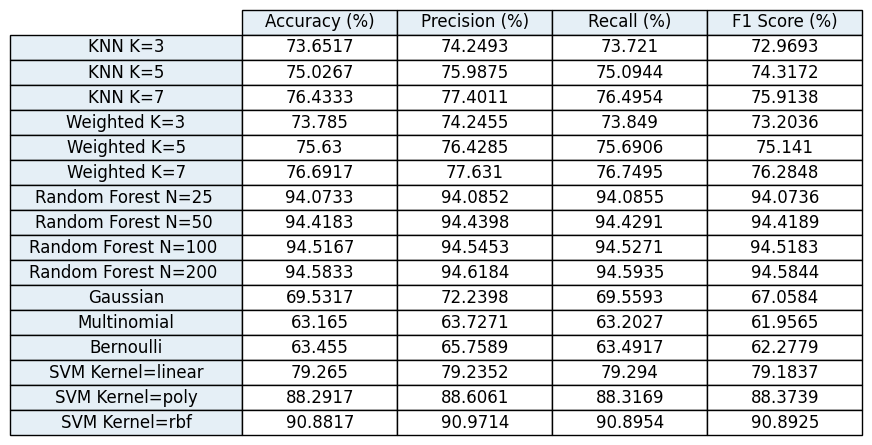

In [31]:
all_values = [*knn_values, *weighted_knn_values, *random_forest_values, *nb_values_values, *svm_values]
all_row_labels = [ *[f"KNN K={k}" for k in k_values],   *[f"Weighted K={k}" for k in k_values], *[f"Random Forest N={n} " for n in n_values], *nb_names, *[f"SVM Kernel={k}" for k in kernel_values] ]
show_table(all_values, all_row_labels, "")

#### **Conclusion**  
Similar to Part I, Part II involved evaluating several classification algorithms **K-Nearest Neighbors (KNN), Weighted KNN, Random Forest, Naive Bayes, and Support Vector Machine (SVM)**, but this time applied to image features (RGB statistics and grayscale histograms).

Before evaluating the performance of each model, it is important to highlight the impact of **K-Fold Cross-Validation** in our study. In **Part I**, we observed that applying **K-Fold Cross-Validation** helped us obtain **more stable and reliable results**. Instead of relying on a single train-test split, we ran our models with **K=10**, which provided a **better estimate of model performance and reduced the impact of random variations in data selection**. This ensured that our evaluation was **fair and consistent across different models**.

##### <ins>**Performance Results**</ins>  

The results show that different machine learning models performed at different levels based on their structure and parameters.  

- **Support Vector Machine (SVM)** gave the best results. The **RBF kernel** had the highest accuracy (**90.88%**) and F1-score (**90.89%**). The **Polynomial kernel** also performed well (**88.29% accuracy**), while the **Linear kernel** was lower (**79.27% accuracy**). This suggests that **non-linear kernels work better for this dataset**.  

- **Random Forest** performed very well, with accuracy between **94.12% and 94.61%**. Increasing the number of trees (from 25 to 200) slightly improved performance, but the improvement was small, meaning that **adding more trees does not always make a big difference**.  

- **K-Nearest Neighbors (KNN)** achieved **moderate results**, with accuracy between **73.65% and 76.43%**. Increasing K (the number of neighbors) improved performance slightly.
- Also, **Weighted KNN performed better than regular KNN**, especially at **K=7**, where it reached **76.69% accuracy**.  

- **Naive Bayes models had mixed results.** **Gaussian Naive Bayes** had an accuracy of **69.53%**, while **Multinomial** and **Bernoulli Naive Bayes** performed worse (**63.16% and 63.45% accuracy, respectively**). **Bernoulli Naive Bayes** struggled because the dataset contains continuous numbers, which this model does not handle well.  

##### <ins>**Final Thoughts**</ins>  

In conclusion, image-based feature extraction (RGB and grayscale histograms) successfully distinguished the rice varieties. **SVM and Random Forest** once again emerged as the most effective methods in terms of accuracy and F1 score, handling the higher-dimensional image features well. **K-Fold Cross-Validation** confirmed the reliability of these models. As in Part I, ensemble methods and kernel-based approaches appear to excel, while distance-based methods (KNN) have more difficulty in image-based contexts, especially with numerous features.



## **References**

- [Scikit Learn Metrics - Scikit Learn](https://scikit-learn.org/stable/api/sklearn.metrics.html) - Access Date: 03/03/2025
- [KNN - Geeks for Geeks](https://www.geeksforgeeks.org/k-nearest-neighbours/) - Access Date: 03/03/2025
- [Weighted KNN - Geeks for Geeks](https://www.geeksforgeeks.org/weighted-k-nn/) - Access Date: 03/03/2025
- [Naive Bayes - Geeks for Geeks](https://www.geeksforgeeks.org/naive-bayes-classifiers/) - Access Date: 03/03/2025
- [Random Forest - Geeks for Geeks](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/) - Access Date: 03/03/2025
- [Suppoer Vector Machine - Geeks for Geeks](https://www.geeksforgeeks.org/support-vector-machine-algorithm/) - Access Date: 03/03/2025
- [Simple Table - Medium](https://medium.com/towards-data-science/simple-little-tables-with-matplotlib-9780ef5d0bc4/) - Access Date: 03/03/2025
- [SVM Implementation - Geeks for Geeks](https://www.geeksforgeeks.org/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/) - Access Date: 10/03/2025
- [SVM Implementation - Geeks for Geeks](https://www.geeksforgeeks.org/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/) - Access Date: 10/03/2025
- [PCA - Geeks for Geeks](https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/) - Access Date: 13/03/2025
- [Min Max Scaler - Geeks for Geeks](https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/) - Access Date: 13/03/2025
- [SVC - Geeks for Geeks](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) - Access Date: 13/03/2025
